# Homework 3, assignment 2



-Salomé Poulain 13955993 <br>
-Myriam Belkhatir 15755916

---

Global imports:

In [1]:
from game import Play
import numpy as np

Global paramters

In [86]:
def make_A_delta(delta):
    """
    A = [[1, delta],
         [1-delta, 1]]
    is zero‐sum after centering? For raw A it's fine as a toy.
    """
    return np.array([[10.0, delta],
                     [1.0-delta, 1.0]])

In [87]:
# full grid 0, 0.02, …, 0.98, 1.00
full = np.arange(0.0, 1.00+1e-8, 0.02)

# drop the endpoints
deltas = full[2:-2]

Run the plays and calculate the abs error

In [88]:
plays = {}

for delta in deltas:
    # 1) build the payoff matrix for this δ
    A = make_A_delta(delta)

    # 2) instantiate Play (equilibrium is computed in __init__)
    p = Play(A, iterations=20000)
    
    p.run()
    p.calc_error()

    # 3) store the object
    plays[delta] = p

    # 4) print the Nash equilibrium it found
    print(f"δ = {delta:.2f}  →  x* = {p.x_eq},  y* = {p.y_eq}")

δ = 0.04  →  x* = [0.004 0.996],  y* = [0.096 0.904]
δ = 0.06  →  x* = [0.006 0.994],  y* = [0.094 0.906]
δ = 0.08  →  x* = [0.008 0.992],  y* = [0.092 0.908]
δ = 0.10  →  x* = [0.01 0.99],  y* = [0.09 0.91]
δ = 0.12  →  x* = [0.012 0.988],  y* = [0.088 0.912]
δ = 0.14  →  x* = [0.014 0.986],  y* = [0.086 0.914]
δ = 0.16  →  x* = [0.016 0.984],  y* = [0.084 0.916]
δ = 0.18  →  x* = [0.018 0.982],  y* = [0.082 0.918]
δ = 0.20  →  x* = [0.02 0.98],  y* = [0.08 0.92]
δ = 0.22  →  x* = [0.022 0.978],  y* = [0.078 0.922]
δ = 0.24  →  x* = [0.024 0.976],  y* = [0.076 0.924]
δ = 0.26  →  x* = [0.026 0.974],  y* = [0.074 0.926]
δ = 0.28  →  x* = [0.028 0.972],  y* = [0.072 0.928]
δ = 0.30  →  x* = [0.03 0.97],  y* = [0.07 0.93]
δ = 0.32  →  x* = [0.032 0.968],  y* = [0.068 0.932]
δ = 0.34  →  x* = [0.034 0.966],  y* = [0.066 0.934]
δ = 0.36  →  x* = [0.036 0.964],  y* = [0.064 0.936]
δ = 0.38  →  x* = [0.038 0.962],  y* = [0.062 0.938]
δ = 0.40  →  x* = [0.04 0.96],  y* = [0.06 0.94]
δ = 0.42 

Plot all graphs

C:\Users\Saloc\AppData\Local\Temp\ipykernel_57844\1953200115.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


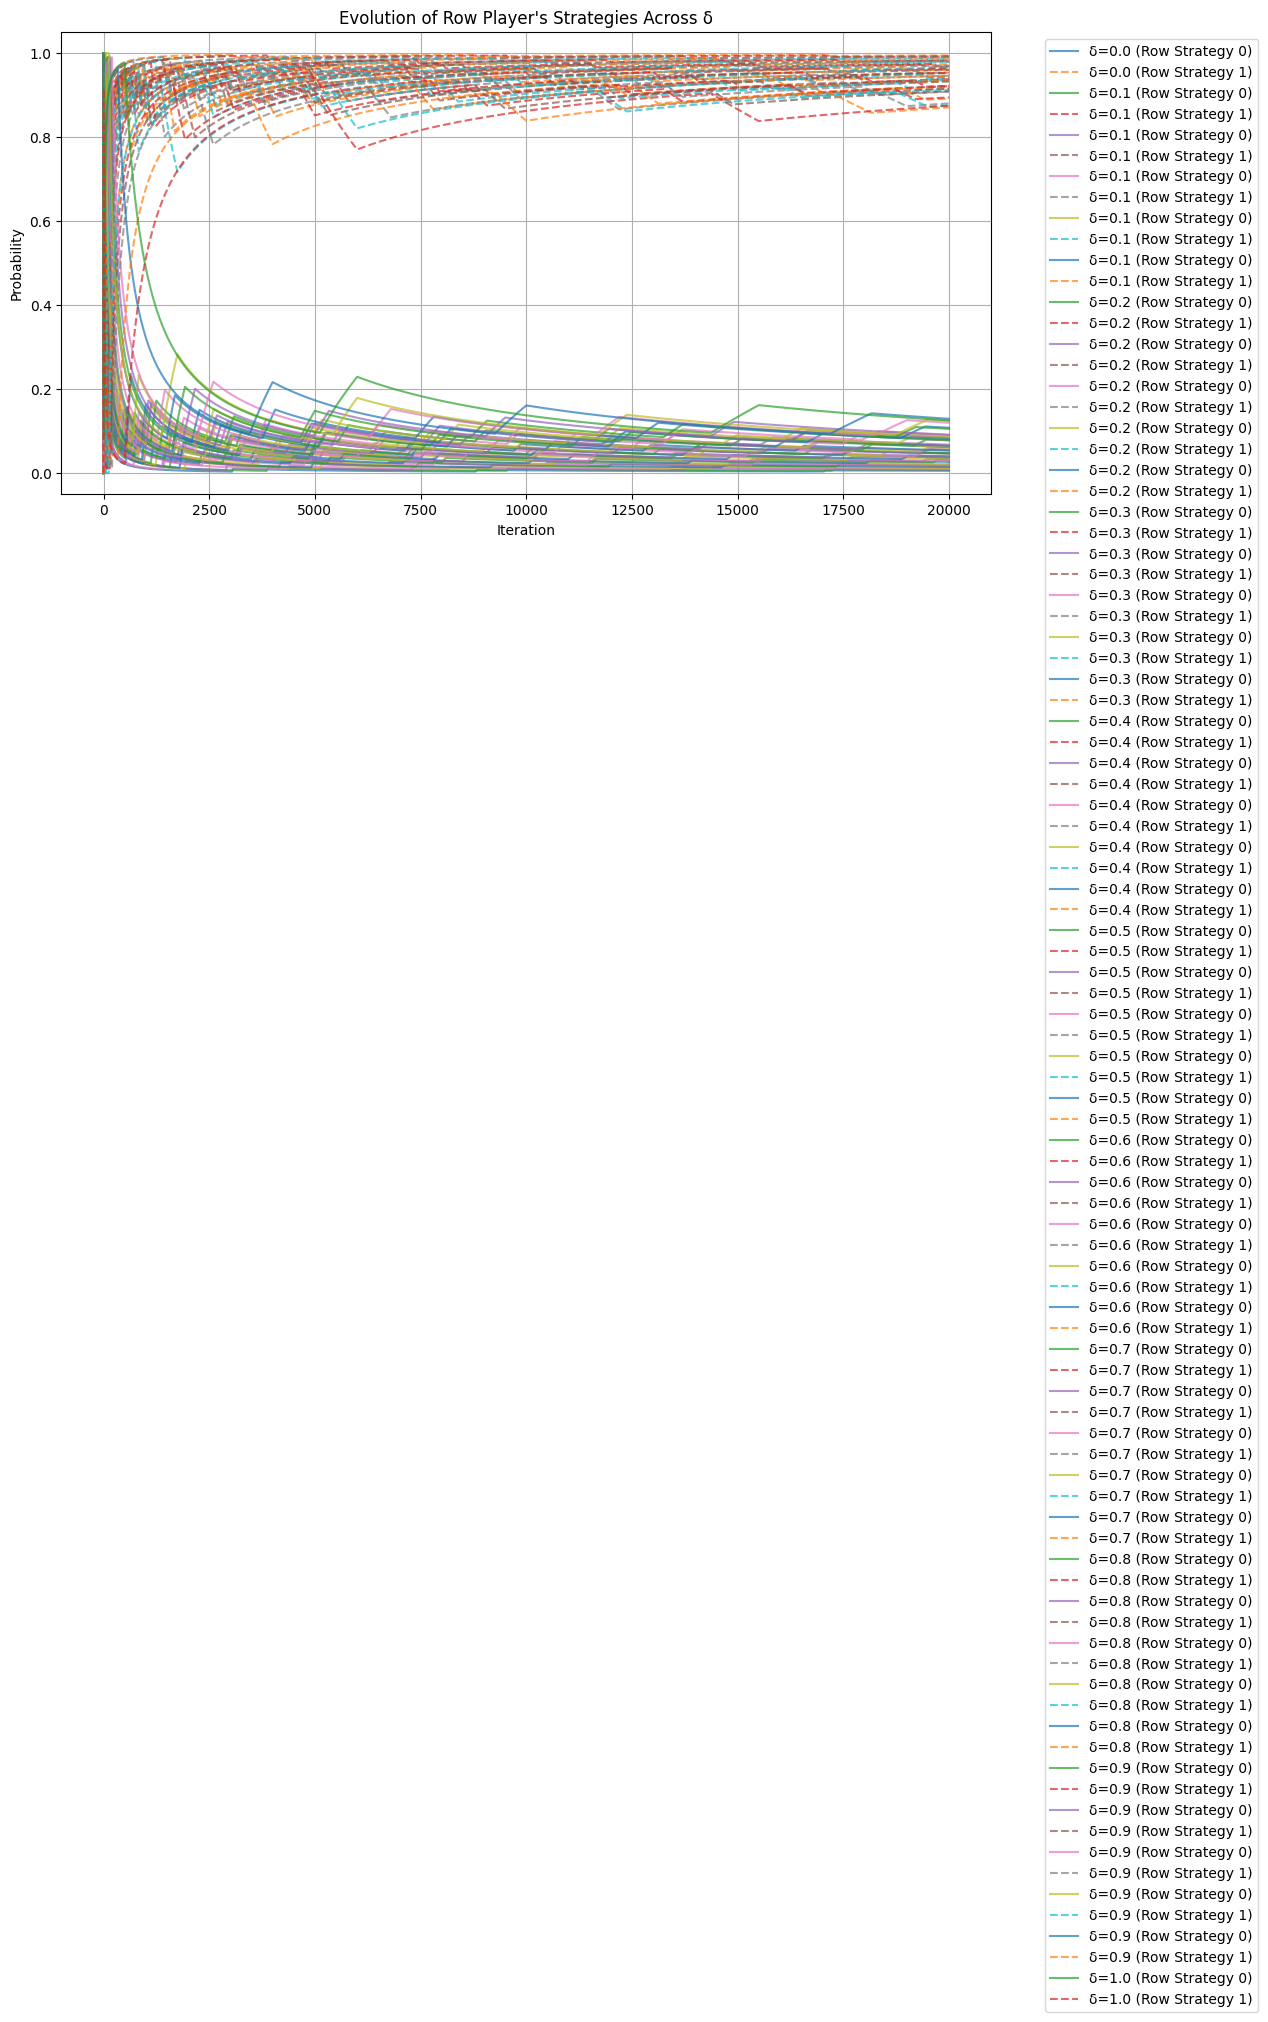

In [89]:
import matplotlib.pyplot as plt

# Plot all plays
plt.figure(figsize=(12, 6))

for delta, play in plays.items():
    # Extract empirical mixes
    x_hat = play.x_hat
    y_hat = play.y_hat

    # Plot row player's strategy evolution
    plt.plot(x_hat[:, 0], label=f"δ={delta:.1f} (Row Strategy 0)", alpha=0.7)
    plt.plot(x_hat[:, 1], label=f"δ={delta:.1f} (Row Strategy 1)", alpha=0.7, linestyle='--')

# Add labels and legend
plt.title("Evolution of Row Player's Strategies Across δ")
plt.xlabel("Iteration")
plt.ylabel("Probability")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Oscilation frequency analysis

<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Saloc\AppData\Local\Temp\ipykernel_57844\1921670009.py:21: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Fast‐mode frequency vs. $\delta$ (peak‐spacing)')


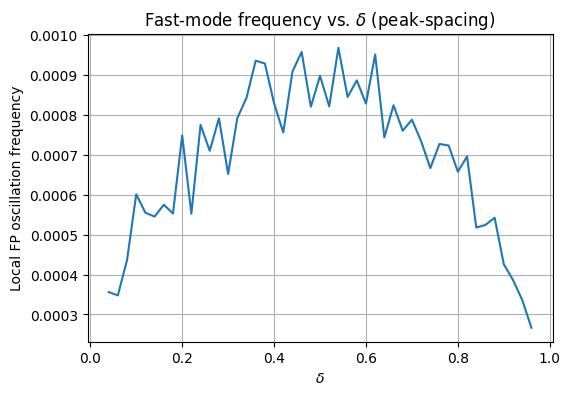

In [100]:
from scipy.signal import hilbert, find_peaks

# 2) Peak‐spacing approach
f_peak = []

for delta in deltas:
    e = plays[delta].x_error
    # find local maxima (you may need to tweak height or distance)
    peaks, _ = find_peaks(e, distance=1)  
    # compute spacing between peaks, ignore the very first few
    spacing = np.diff(peaks)[:]  # skip early transients
    mean_sp  = spacing.mean()
    f_peak.append((delta, 1.0/mean_sp))

d_arr, f2_arr = zip(*f_peak)

plt.figure(figsize=(6,4))
plt.plot(d_arr, f2_arr)
plt.xlabel(r'$\delta$')
plt.ylabel('Local FP oscillation frequency')
plt.title('Fast‐mode frequency vs. $\delta$ (peak‐spacing)')
plt.grid(True)
plt.show()

→  f(δ) ≈ 0.000982 · [δ(1−δ)]^0.573


<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:42: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Saloc\AppData\Local\Temp\ipykernel_57844\1312222252.py:42: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Peak‐spacing frequency vs. $\delta$ and bell‐curve fit')


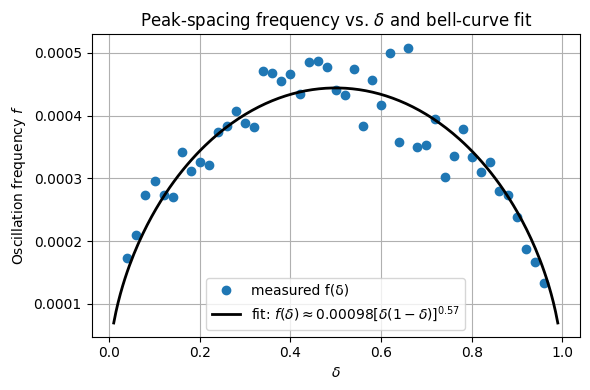

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 1) Compute peak‐spacing frequencies
f_list = []
for delta in sorted(plays.keys()):
    e = plays[delta].x_error
    # find local maxima: you may need to tweak distance/prominence
    peaks, _ = find_peaks(e, distance=50, prominence=np.std(e)*0.1)
    if len(peaks) > 1:
        # median spacing between successive peaks
        med_sp = np.median(np.diff(peaks))
        f_est  = 1.0 / med_sp
    else:
        f_est = np.nan
    f_list.append((delta, f_est))

# filter out any NaNs and unzip
filtered = [(d, f) for d, f in f_list if not np.isnan(f)]
d_arr, f_arr = zip(*filtered)
d_arr = np.array(d_arr)
f_arr = np.array(f_arr)

# 2) Fit log f = log C + p * log[δ(1−δ)]
X = np.log(d_arr * (1 - d_arr))
Y = np.log(f_arr)
p, logC = np.polyfit(X, Y, 1)
C = np.exp(logC)
print(f"→  f(δ) ≈ {C:.3g} · [δ(1−δ)]^{p:.3g}")

# 3) Plot data and fitted curve
d_plot = np.linspace(0.01, 0.99, 200)
f_fit  = C * (d_plot * (1 - d_plot))**p

plt.figure(figsize=(6,4))
plt.plot(d_arr, f_arr, 'o', label='measured f(δ)')
plt.plot(d_plot, f_fit, '-k', lw=2,
         label=rf'fit: $f(\delta)\approx {C:.2g}[\delta(1-\delta)]^{{{p:.2f}}}$')
plt.xlabel(r'$\delta$')
plt.ylabel('Oscillation frequency $f$')
plt.title('Peak‐spacing frequency vs. $\delta$ and bell‐curve fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fitted model: e(t) ≈ 2.54 · t^(-0.318)


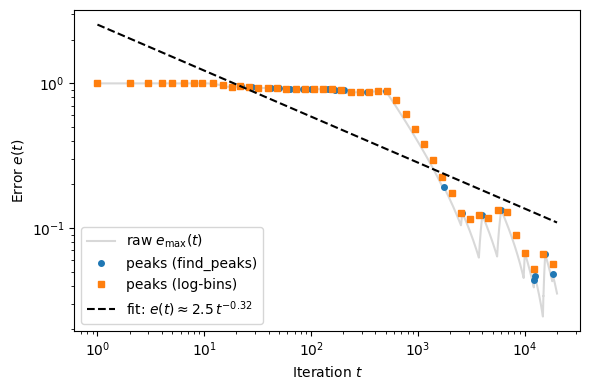

In [92]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1) Stack your error‐curves and form e_max(t)
# ------------------------------------------------------------------
# Simply grab all values out of your dict:
err_list = [p.x_error for p in plays.values()]
errs     = np.vstack(err_list)          # shape = (n_delta, T)
e_max    = np.max(errs, axis=0)         # worst‐case error at each t
T        = e_max.size
t        = np.arange(1, T+1)

# ------------------------------------------------------------------
# 2A) Local‐peak detection on e_max(t)
#     we demand a minimum prominence to ignore tiny ripples
# ------------------------------------------------------------------
prom       = np.median(e_max) * 1e-2
peaks_idx, _ = find_peaks(e_max, prominence=prom)
t_peaks_A  = t[peaks_idx]
e_peaks_A  = e_max[peaks_idx]

# ------------------------------------------------------------------
# 2B) Log‐spaced binning + max in each bin
# ------------------------------------------------------------------
n_bins    = 50
bin_edges = np.logspace(np.log10(1), np.log10(T), n_bins+1)
digitized = np.digitize(t, bin_edges)

t_peaks_B = []
e_peaks_B = []
for i in range(1, n_bins+1):
    mask = (digitized == i)
    if not mask.any():
        continue
    t_peaks_B.append(t[mask].mean())
    e_peaks_B.append(e_max[mask].max())

t_peaks_B = np.array(t_peaks_B)
e_peaks_B = np.array(e_peaks_B)

# ------------------------------------------------------------------
# 3) Fit a power‐law   e(t) ≈ C · t^{-α}
#    ⇔ log e = log C – α log t   (linear in log–log)
# ------------------------------------------------------------------
t_fit = t_peaks_B
e_fit = e_peaks_B
coeffs = np.polyfit(np.log(t_fit), np.log(e_fit), 1)
alpha  = -coeffs[0]
C      = np.exp(coeffs[1])
print(f"Fitted model: e(t) ≈ {C:.3g} · t^(-{alpha:.3g})")

# ------------------------------------------------------------------
# 4) Plot raw, envelopes, and fit
# ------------------------------------------------------------------
plt.figure(figsize=(6,4))
plt.loglog(t, e_max,   color='gray', alpha=0.3, label=r'raw $e_{\max}(t)$')
plt.loglog(t_peaks_A, e_peaks_A, 'o', ms=4, label='peaks (find_peaks)')
plt.loglog(t_peaks_B, e_peaks_B, 's', ms=4, label='peaks (log‐bins)')

t_smooth = np.logspace(0, np.log10(T), 200)
plt.loglog(t_smooth, C*t_smooth**(-alpha), '--k',
           label=rf'fit: $e(t)\approx {C:.2g}\,t^{{-{alpha:.2g}}}$')

plt.xlabel('Iteration $t$')
plt.ylabel('Error $e(t)$')
plt.legend()
plt.tight_layout()
plt.show()


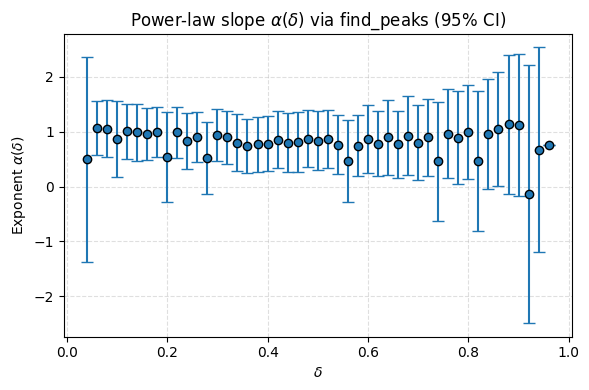

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import linregress

# sort your deltas
deltas = sorted(plays.keys())

# storage for results
valid_d = []
alphas  = []
alpha_se = []

for δ in deltas:
    e = plays[δ].x_error            # error‐time series, length T
    T = e.size
    t = np.arange(1, T+1)

    # -----------------------------------
    # 1) find all local peaks in e(t)
    #    use a minimum prominence to skip tiny numerical ripples
    # -----------------------------------
    prom = np.median(e) * 1e-2       # e.g. 1% of the median level
    peaks_idx, props = find_peaks(e, prominence=prom)

    t_peaks = t[peaks_idx]
    e_peaks = e[peaks_idx]

    # keep only strictly positive peaks
    mask = (e_peaks > 0)
    t_peaks = t_peaks[mask]
    e_peaks = e_peaks[mask]

    # need ≥2 points to fit
    if t_peaks.size < 2:
        print(f"δ={δ:.2f} skipped: only {t_peaks.size} peaks")
        continue

    # -----------------------------------
    # 2) fit log e_peak = intercept + slope * log t_peak
    #    so that slope = -α
    # -----------------------------------
    logt = np.log(t_peaks)
    loge = np.log(e_peaks)
    slope, intercept, r, p, stderr = linregress(logt, loge)

    α    = -slope
    se_α = stderr

    valid_d.append(δ)
    alphas.append(α)
    alpha_se.append(se_α)

# convert to arrays
valid_d   = np.array(valid_d)
alphas    = np.array(alphas)
alpha_se  = np.array(alpha_se)

# 95% CI half‐width
ci95 = 1.96 * alpha_se

# -----------------------------------
# 3) plot α(δ) with error‐bars
# -----------------------------------
plt.figure(figsize=(6,4))
plt.errorbar(valid_d, alphas, yerr=ci95,
             fmt='o', capsize=4, mec='k', mfc='C0')
plt.grid(which='both', ls='--', alpha=0.4)
plt.xlabel(r'$\delta$')
plt.ylabel(r'Exponent $\alpha(\delta)$')
plt.title(r'Power‐law slope $\alpha(\delta)$ via find_peaks (95% CI)')
plt.tight_layout()
plt.show()


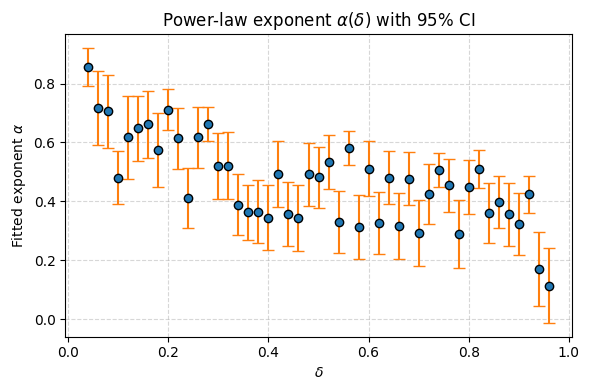

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# parameters
n_bins = 50
deltas = sorted(plays.keys())

# storage
alphas    = []
alpha_se  = []   # standard error of alpha
valid_d   = []   # δ values that had a successful fit

for δ in deltas:
    e = plays[δ].x_error
    T = e.size
    t = np.arange(1, T+1)

    # 1) log‐bins
    bin_edges = np.logspace(np.log10(1), np.log10(T), n_bins+1)
    idx = np.digitize(t, bin_edges)

    t_env = []
    e_env = []
    for b in range(1, n_bins+1):
        m = (idx == b)
        if not m.any():
            continue
        mx = e[m].max()
        if mx > 0:
            t_env.append(t[m].mean())
            e_env.append(mx)

    t_env = np.array(t_env)
    e_env = np.array(e_env)

    # need at least two points
    if t_env.size < 2:
        continue

    # 2) linear fit in log–log
    logt = np.log(t_env)
    loge = np.log(e_env)
    slope, intercept, rval, pval, stderr = linregress(logt, loge)

    α     = -slope
    se_α  = stderr   # same stderr for slope carries over to α

    # store
    valid_d.append(δ)
    alphas.append(α)
    alpha_se.append(se_α)

# convert to arrays
valid_d  = np.array(valid_d)
alphas   = np.array(alphas)
alpha_se = np.array(alpha_se)

# 95% confidence interval half‐width
ci95 = 1.96 * alpha_se

# 6) Plot α vs δ with error‐bars
plt.figure(figsize=(6,4))
plt.errorbar(valid_d, alphas, yerr=ci95, fmt='o',
             ecolor='C1', capsize=4, mec='k', mfc='C0')
plt.xlabel(r'$\delta$')
plt.ylabel(r'Fitted exponent $\alpha$')
plt.title(r'Power‐law exponent $\alpha(\delta)$ with 95% CI')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()
